1. Data Collection and Initial Exploration


In [85]:
# import libraries and uploading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r'D:\ML_Projects\breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [86]:
# checking the shape of data
data.shape

(569, 33)

In [87]:
# checking for information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [88]:
# checking for null values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [89]:
# statistical measures of data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [90]:
# checking for duplicates values
data.duplicated().sum()

np.int64(0)

2.Data Preprocessing:

In [91]:
# ●	Drop unwanted columns 
data.drop(columns=['Unnamed: 32'], inplace=True, axis = 1)

In [92]:

# Handling categorical values - label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["diagnosis"] = le.fit_transform(data["diagnosis"])

In [93]:
data.drop("id", axis = 1, inplace= True)

In [94]:
# seprating feature and target 
features = data.drop("diagnosis", axis=1)
target = data["diagnosis"]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
# checking the distribution of target variable
data["diagnosis"].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [96]:
'''# ●	Handling Imbalance data 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
features,target = ros.fit_resample(features, target)'''

'# ●\tHandling Imbalance data \nfrom imblearn.over_sampling import RandomOverSampler\nros = RandomOverSampler()\nfeatures,target = ros.fit_resample(features, target)'

In [97]:
# checking the distribution of target variable after oversampling
target.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

3. Exploratory Data Analysis (EDA)

In [98]:
# ●	Check Data Distribution

data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


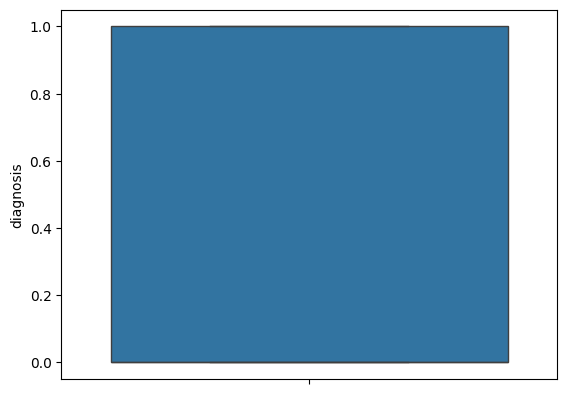

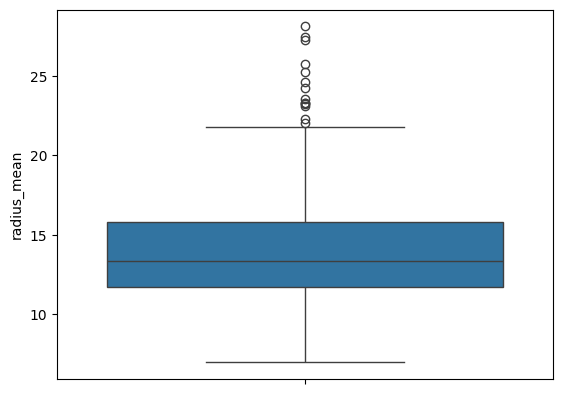

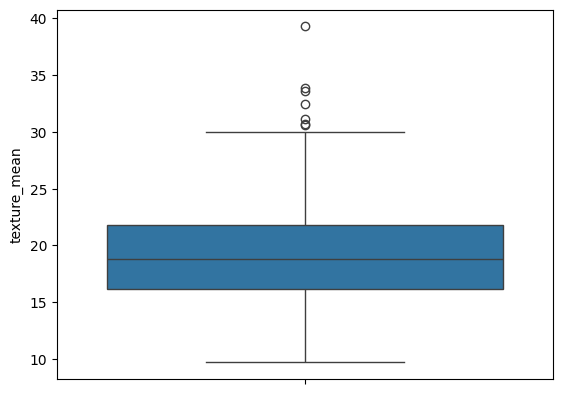

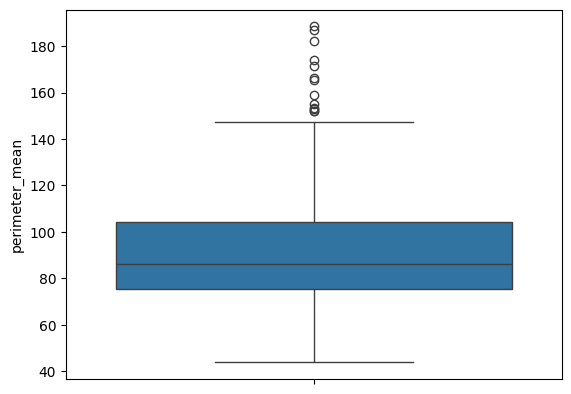

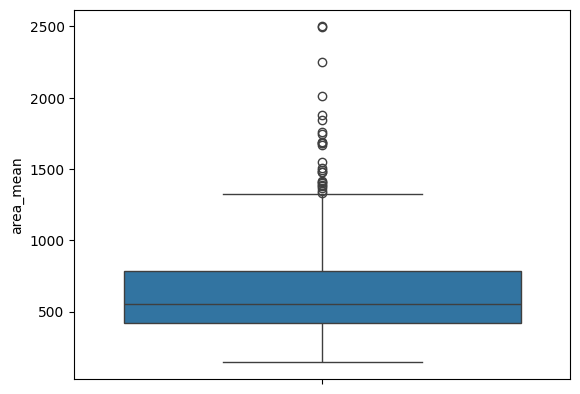

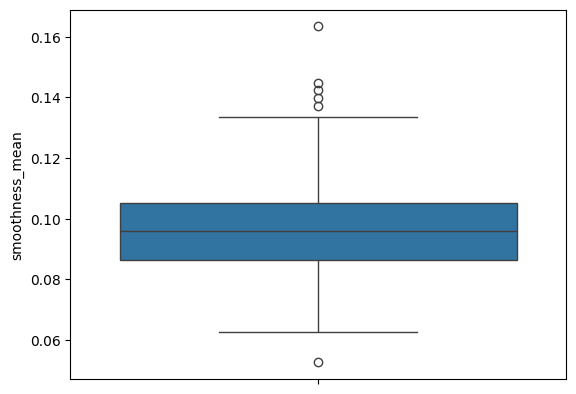

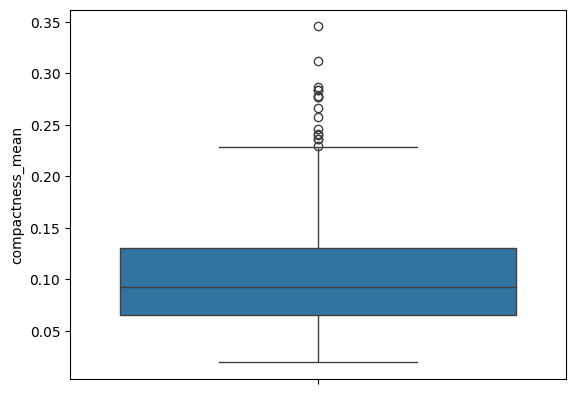

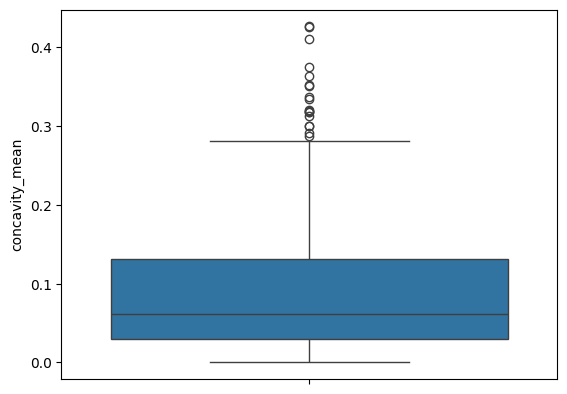

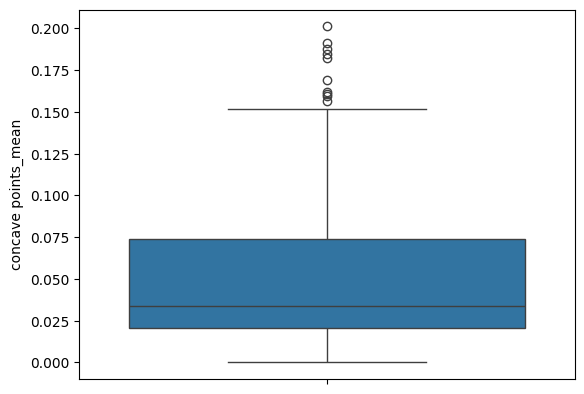

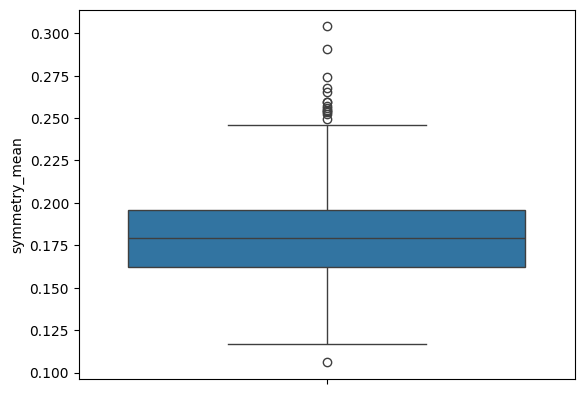

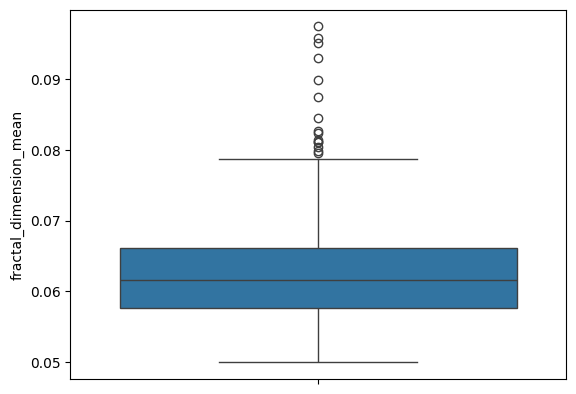

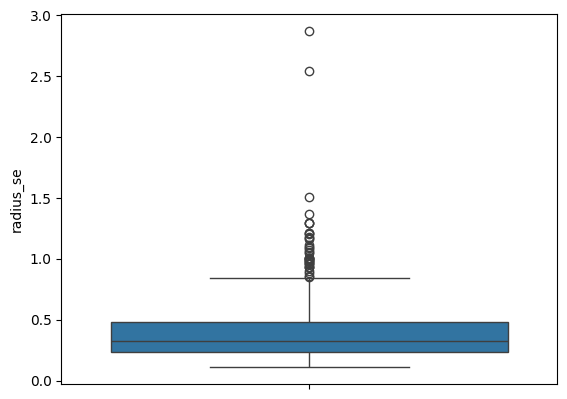

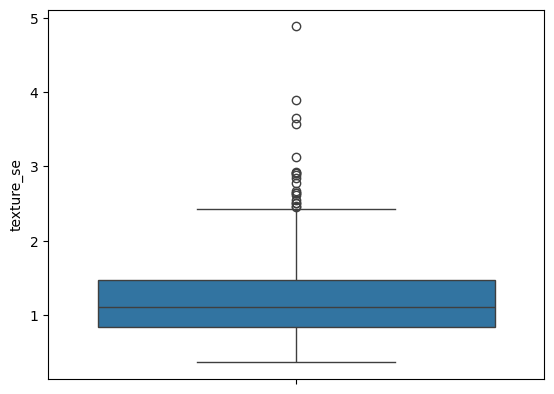

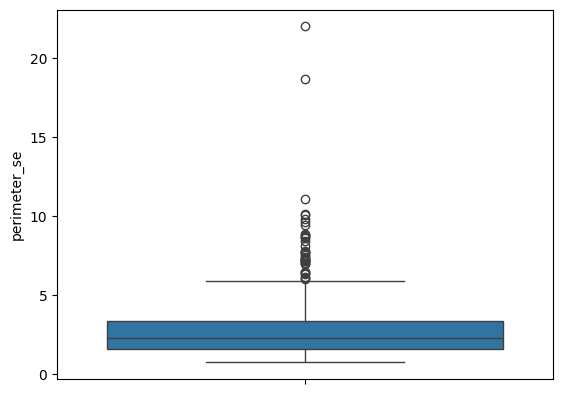

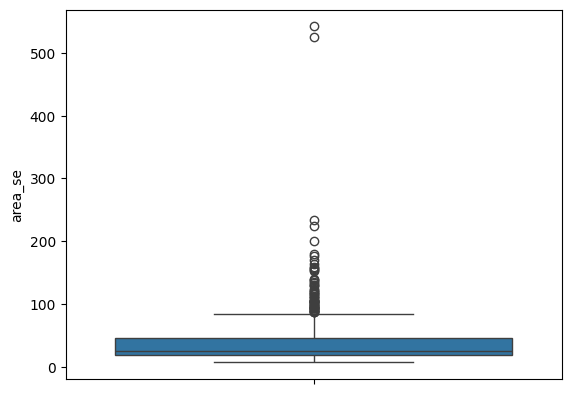

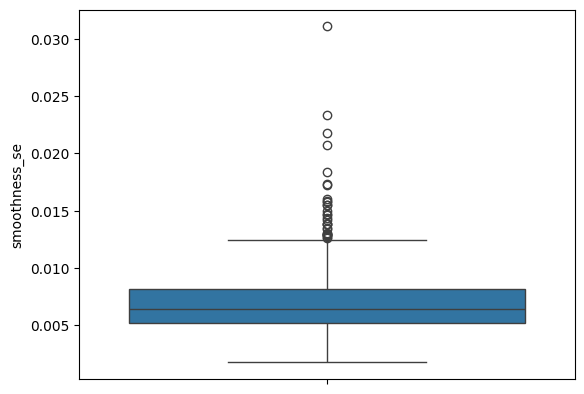

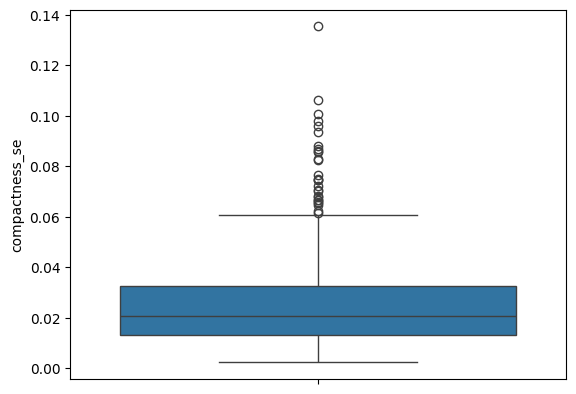

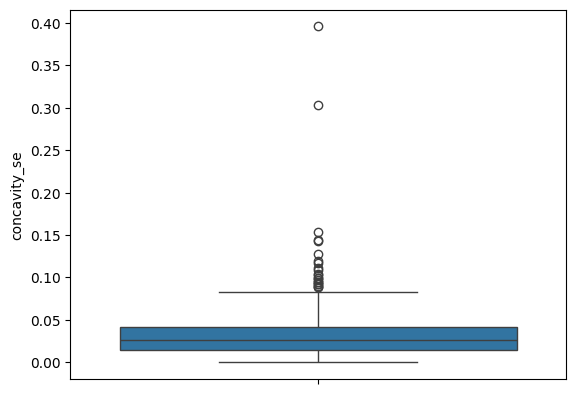

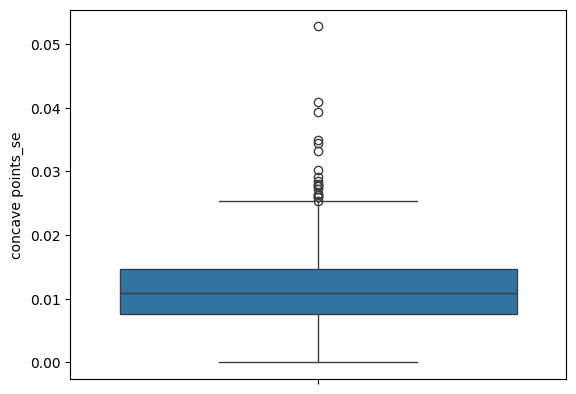

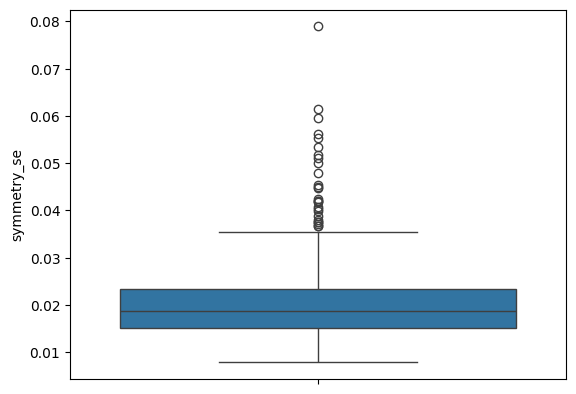

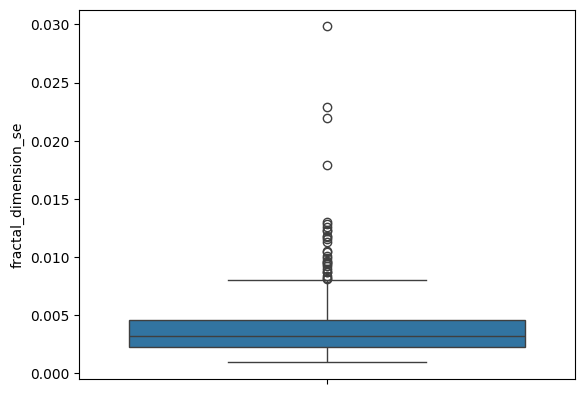

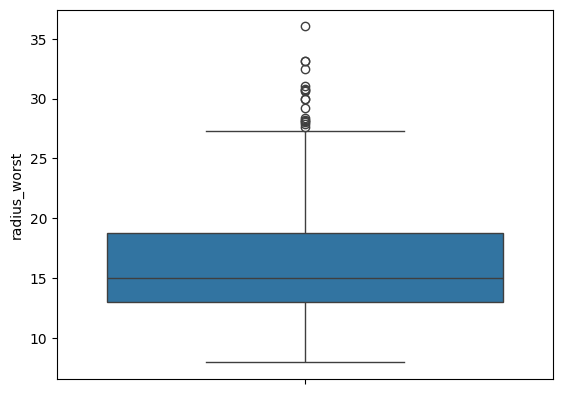

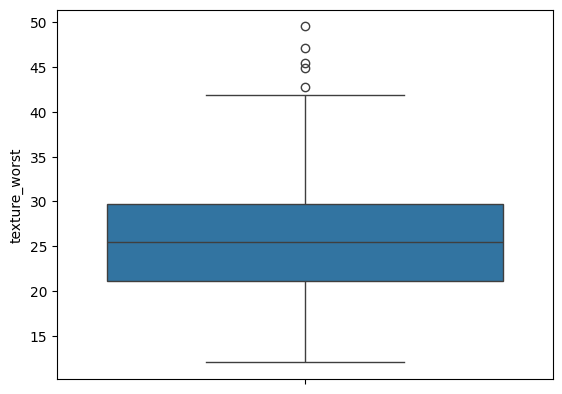

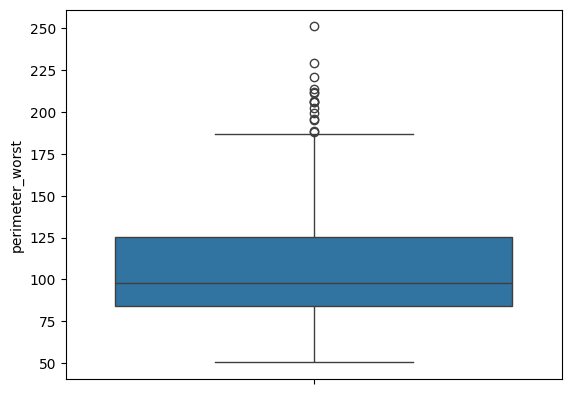

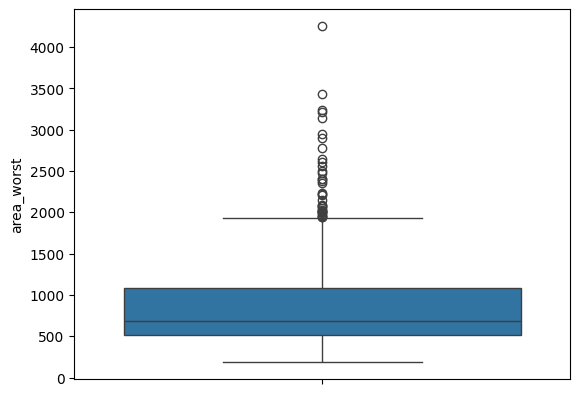

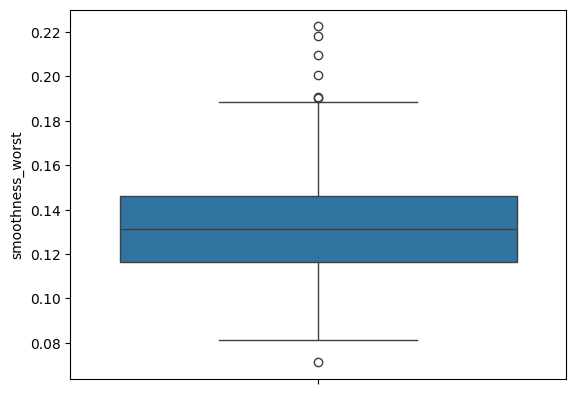

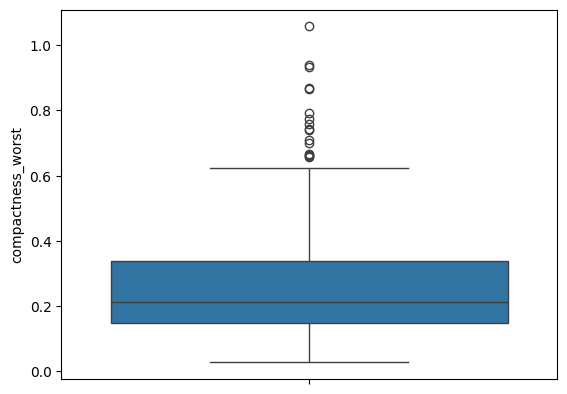

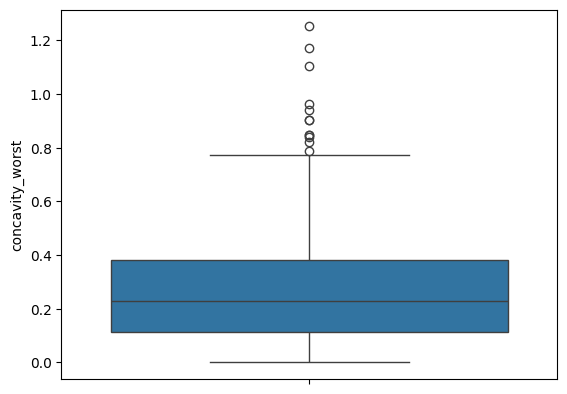

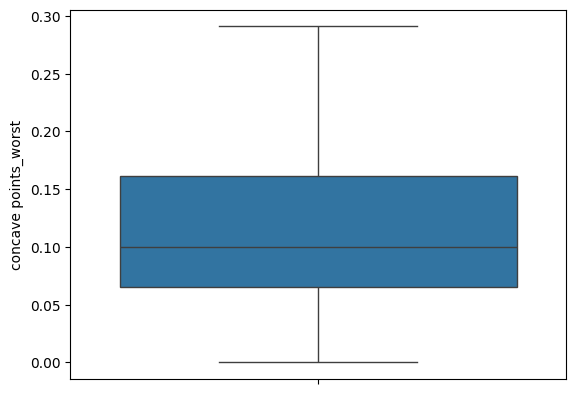

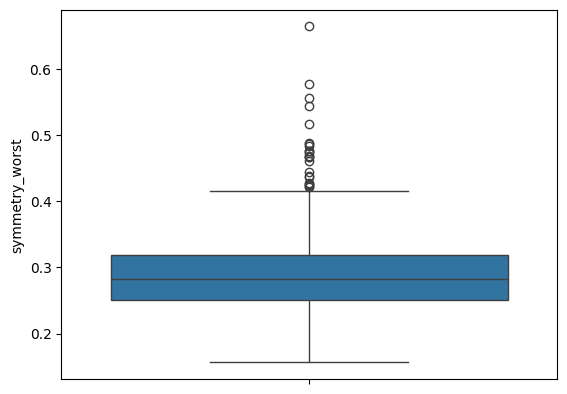

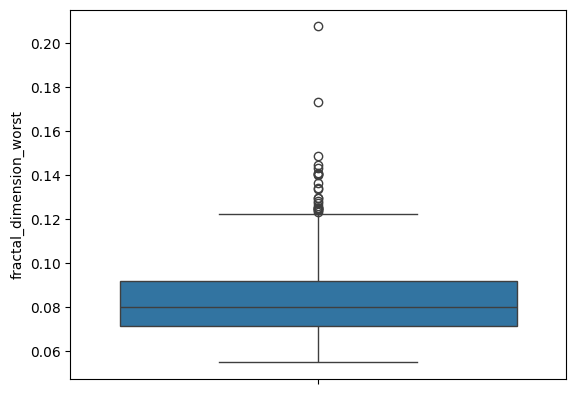

In [99]:
# checking outliers using boxplot
for i in data.select_dtypes(include=["object", "int64", "float64"]).columns:
    sns.boxplot(data[i])
    plt.show()

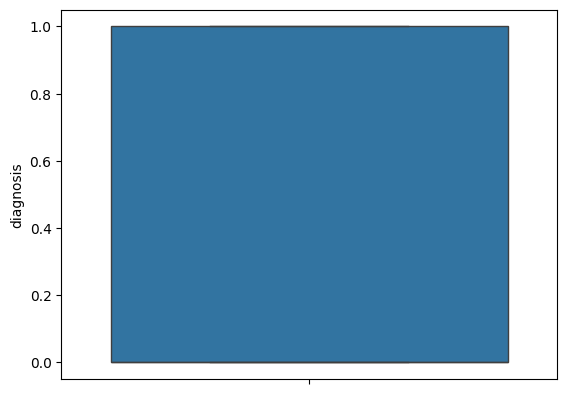

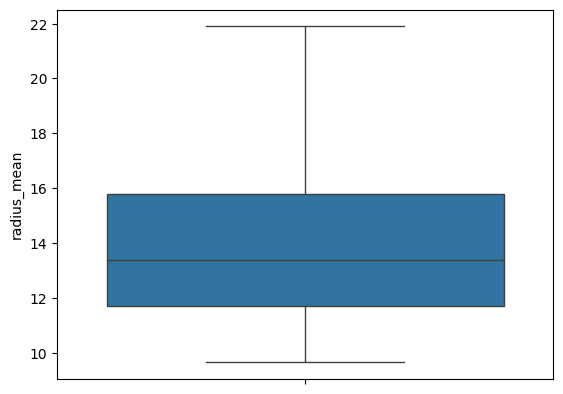

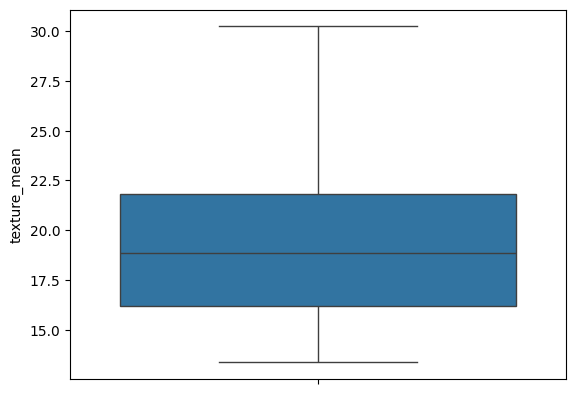

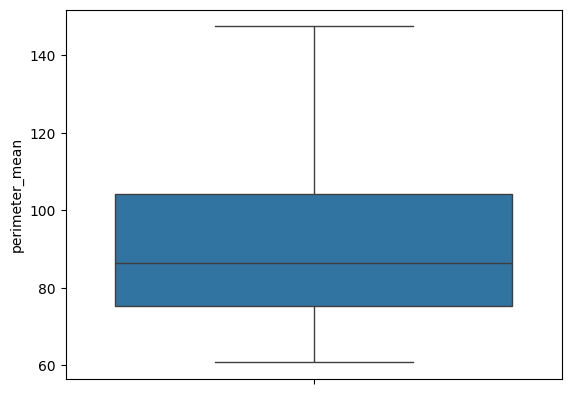

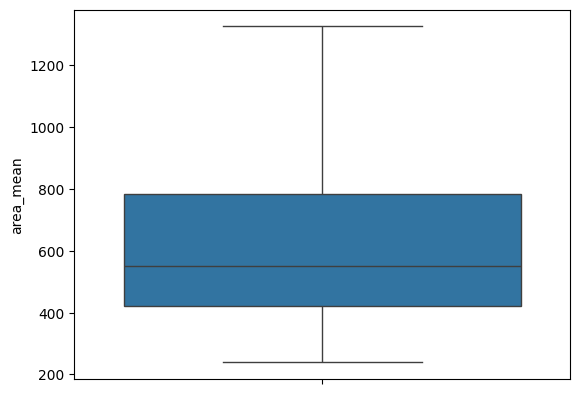

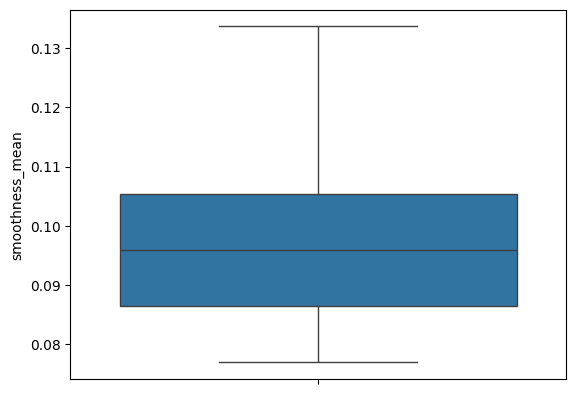

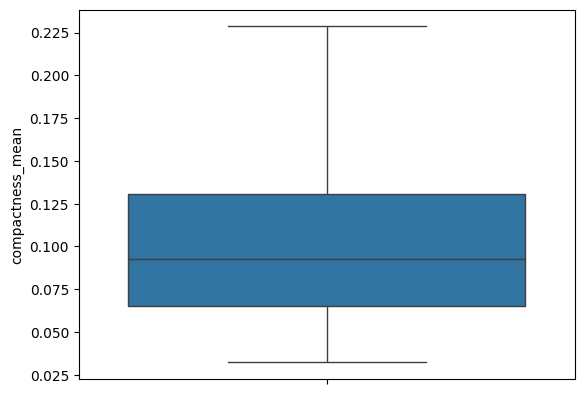

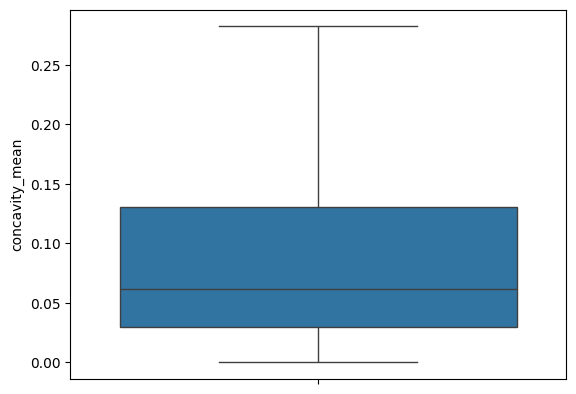

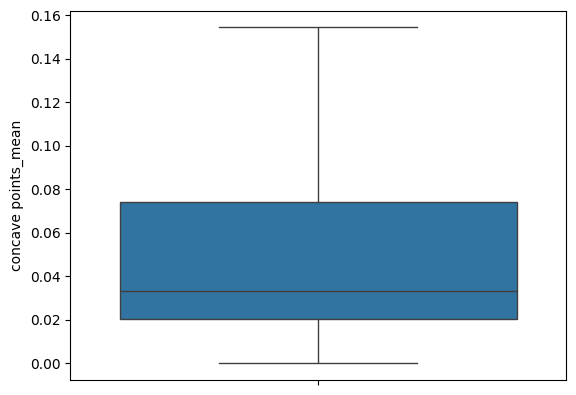

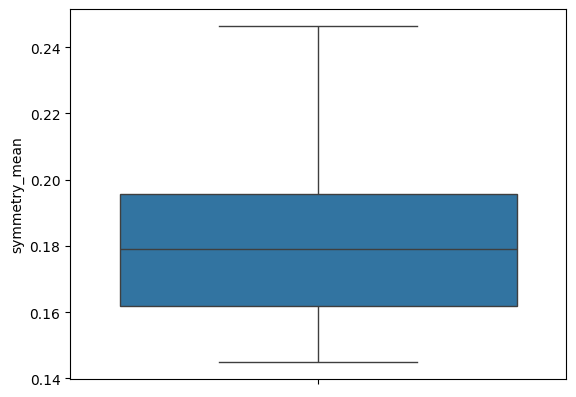

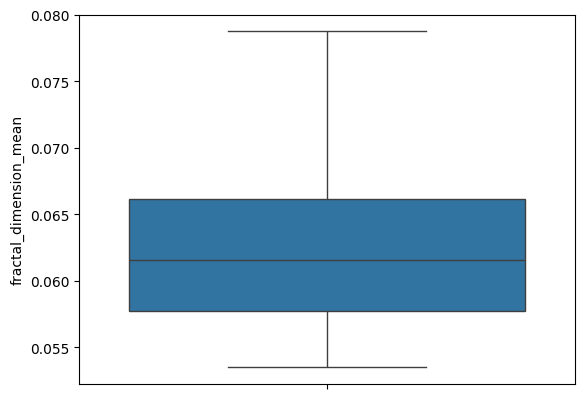

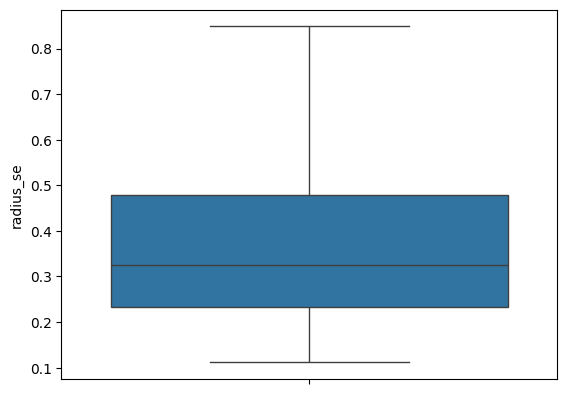

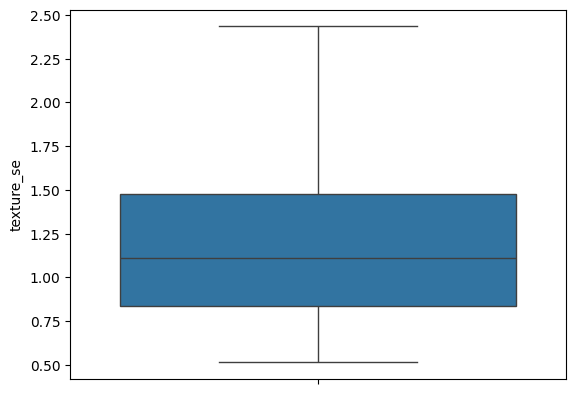

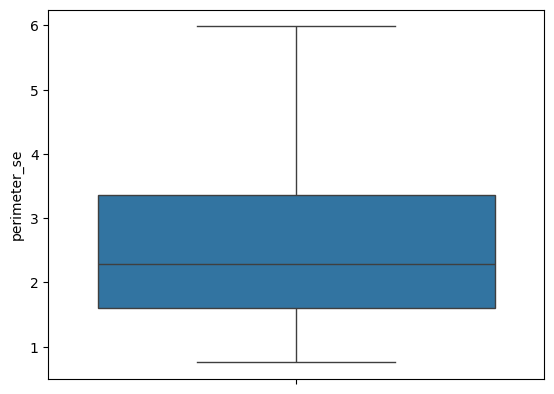

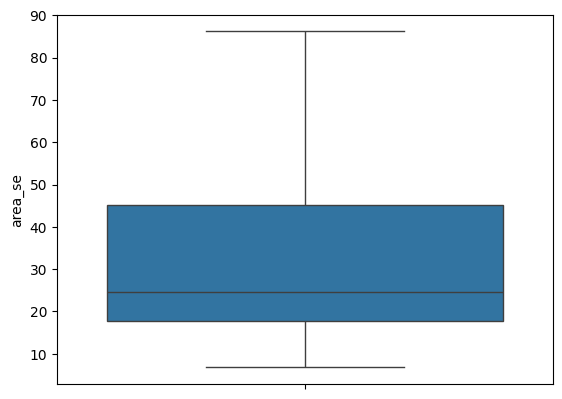

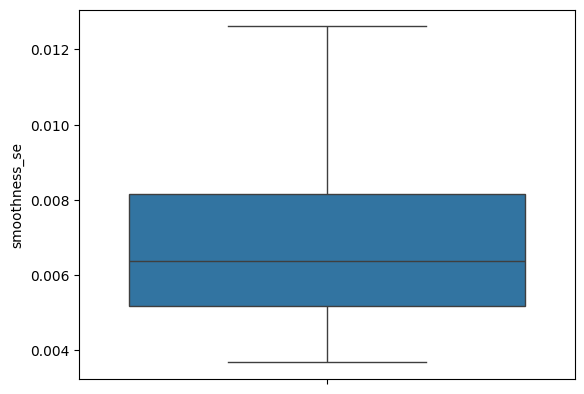

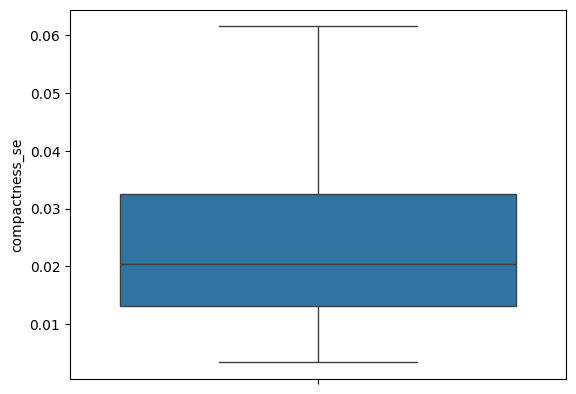

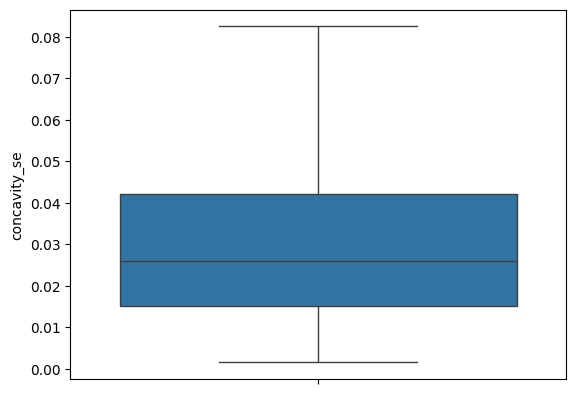

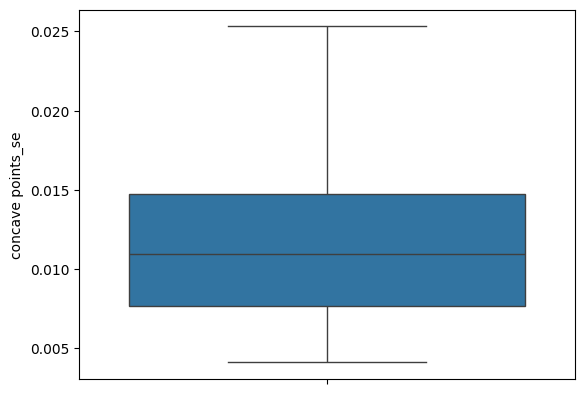

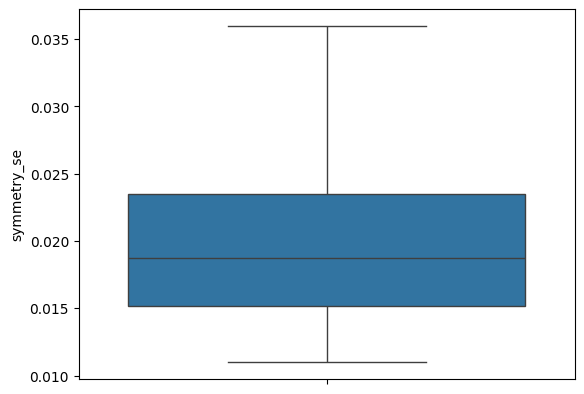

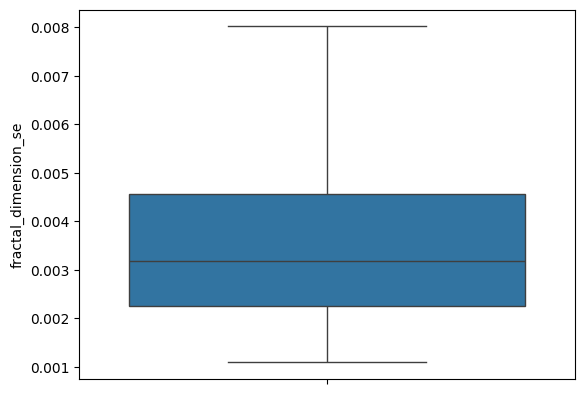

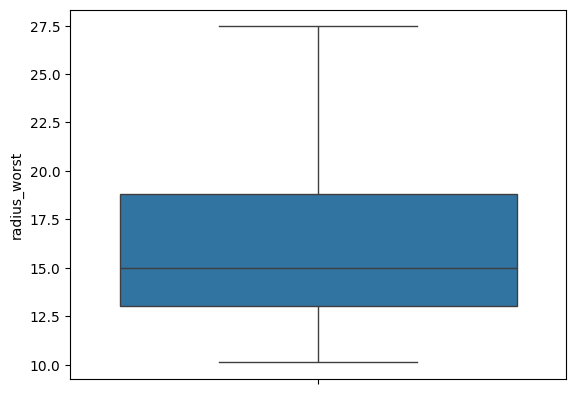

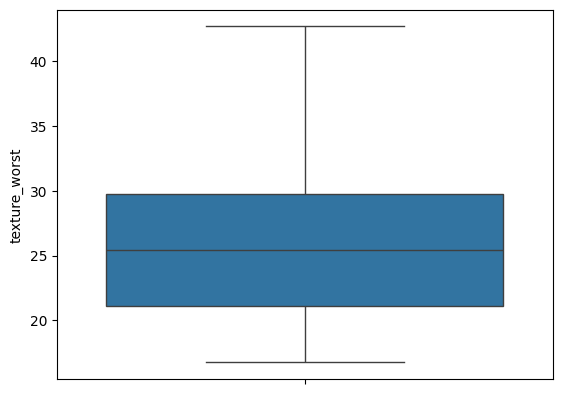

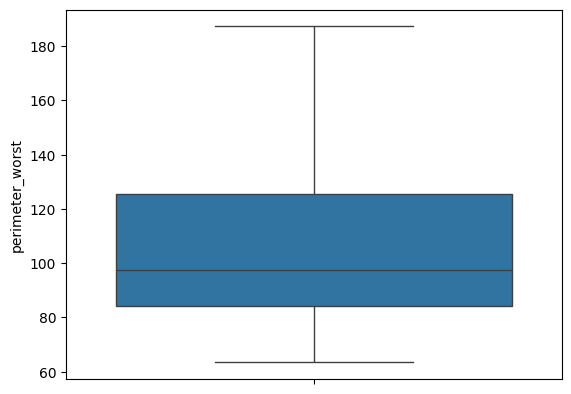

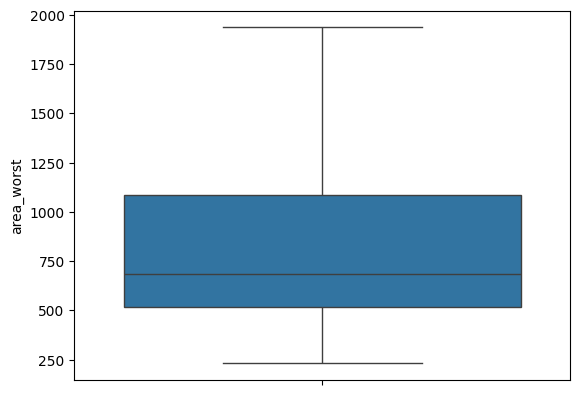

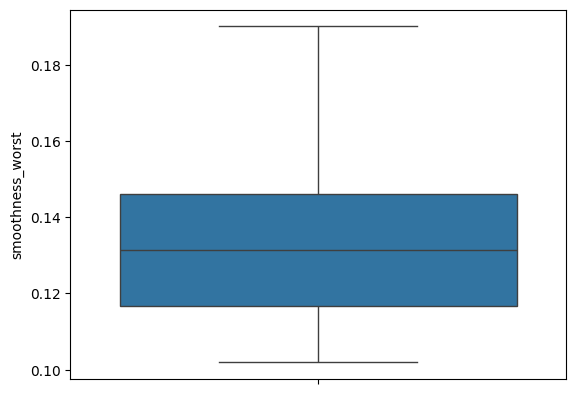

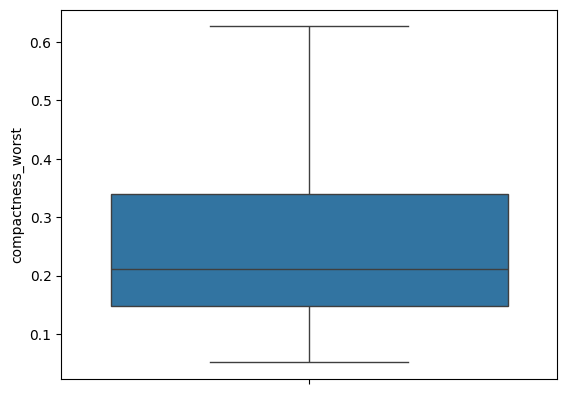

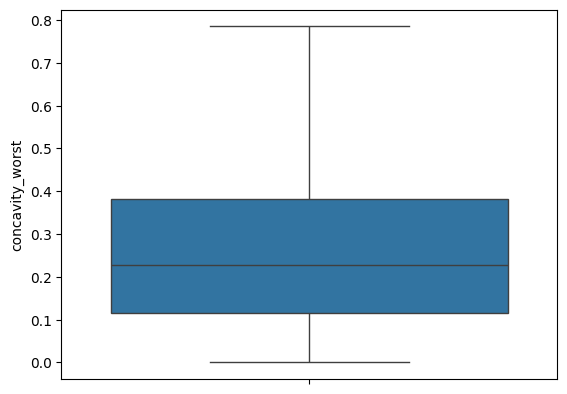

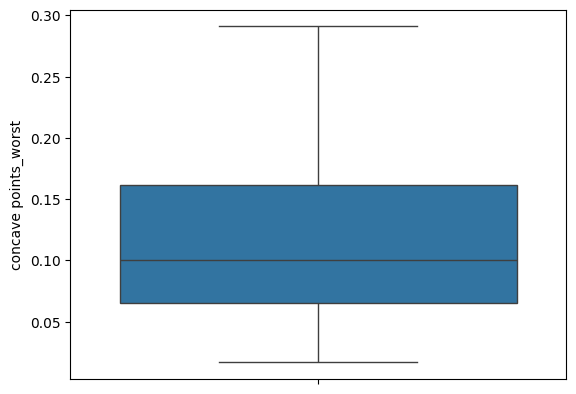

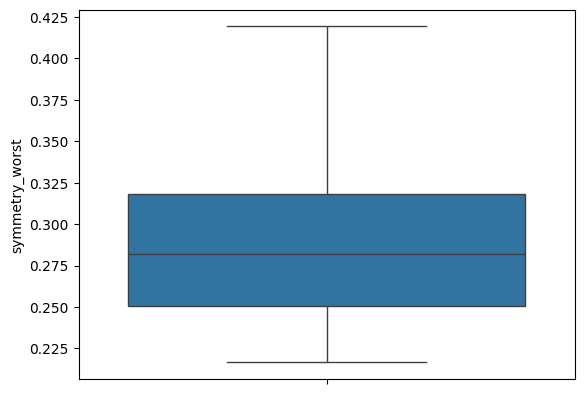

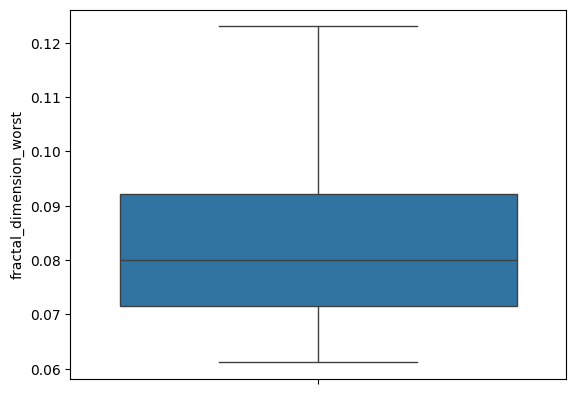

In [100]:
# handling outliers using IQR method
for i in data.select_dtypes(include=["int64", "float64"]).columns:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q3-1.5*iqr
    data[i]=data[i].clip(lower= ll, upper= ul)
    sns.boxplot(data[i])
    plt.show()

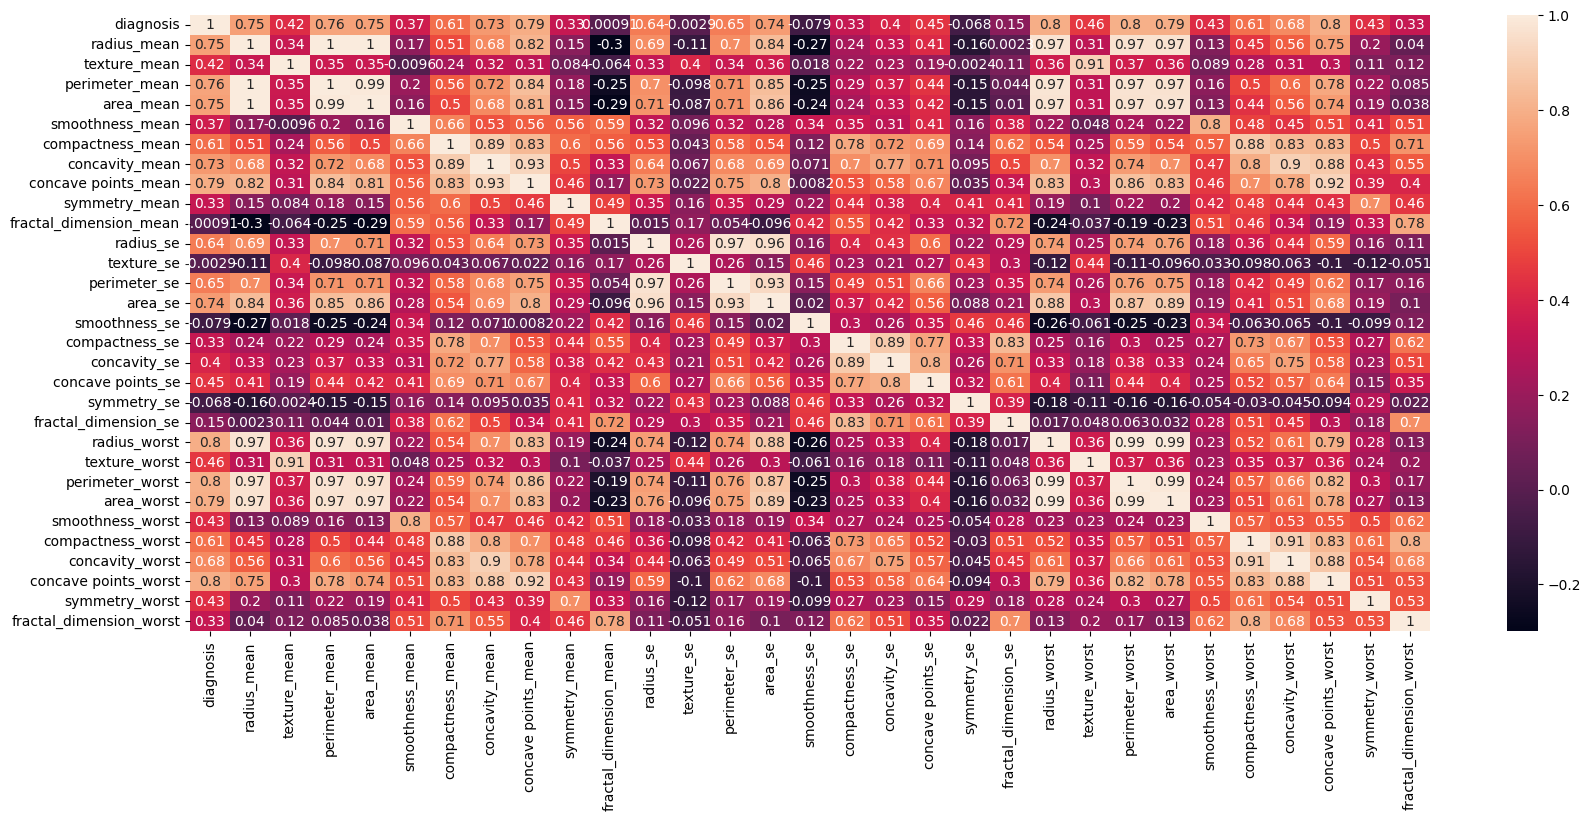

In [101]:
# checking correlation
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

4. Visualisation: 
-	Perform visualisation on different columns 

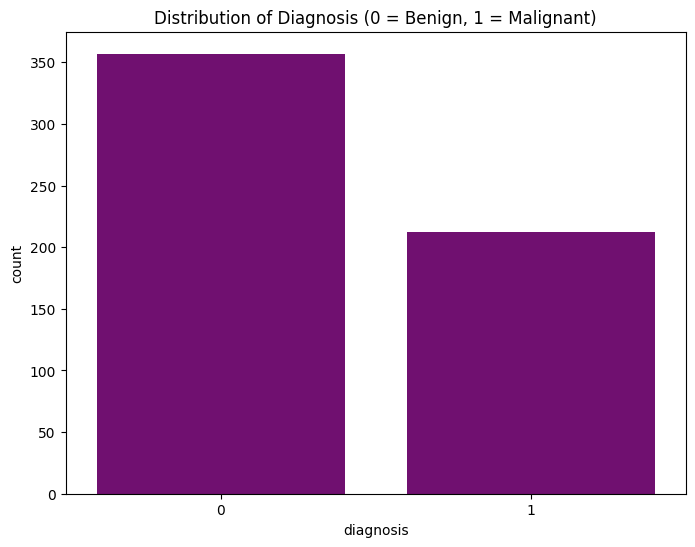

In [102]:
# Distribution of target variable
plt.figure(figsize=(8,6))
sns.countplot(x="diagnosis", data=data, color= "purple")
plt.title("Distribution of Diagnosis (0 = Benign, 1 = Malignant)")
plt.show()


In [103]:
'''# Distribution of features
data.drop(columns=["id", "diagnosis"]).hist(bins=30, figsize=(20,15))
plt.show()'''


'# Distribution of features\ndata.drop(columns=["id", "diagnosis"]).hist(bins=30, figsize=(20,15))\nplt.show()'

In [104]:
'''# Pairplot of selected features
sns.pairplot(data[["radius_mean","texture_mean","perimeter_mean","area_mean","diagnosis"]], hue="diagnosis")
plt.show()'''


'# Pairplot of selected features\nsns.pairplot(data[["radius_mean","texture_mean","perimeter_mean","area_mean","diagnosis"]], hue="diagnosis")\nplt.show()'

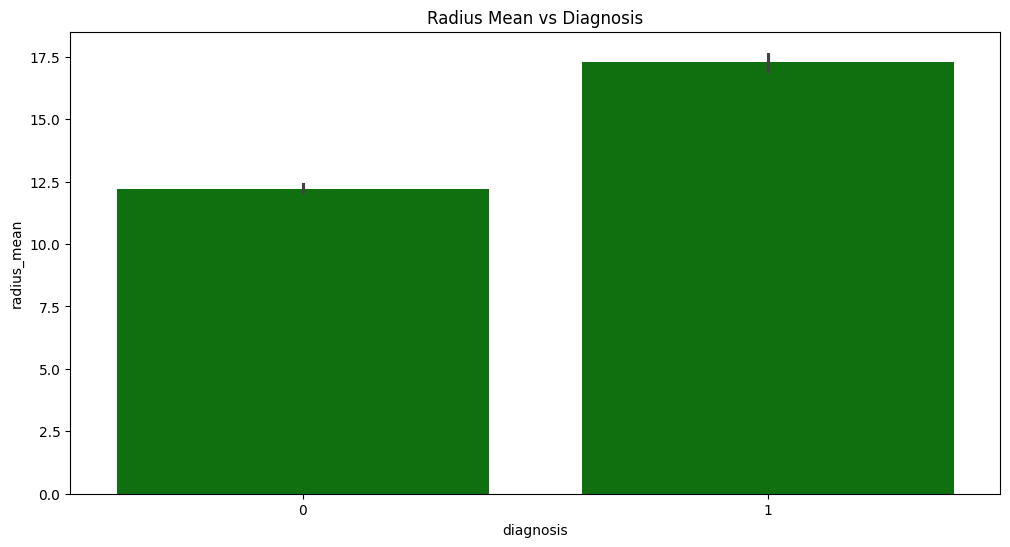

In [105]:
# Radius Mean vs Diagnosis
plt.figure(figsize=(12,6))
sns.barplot(x="diagnosis", y="radius_mean", color= "green", data=data)
plt.title("Radius Mean vs Diagnosis")
plt.show()


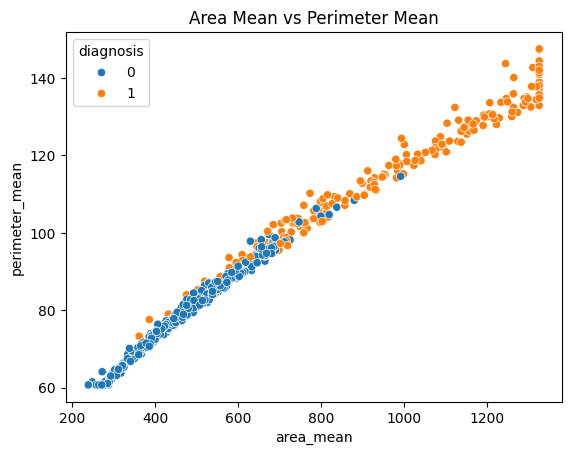

In [106]:
# Area Mean vs Perimeter Mean
sns.scatterplot(x="area_mean", y="perimeter_mean", hue="diagnosis", data=data)
plt.title("Area Mean vs Perimeter Mean")
plt.show()


5. Feature Scaling 

In [107]:
'''# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
features = ss.fit_transform(features)'''

'# Feature Scaling\nfrom sklearn.preprocessing import StandardScaler\nss = StandardScaler()\nfeatures = ss.fit_transform(features)'

6. Model Selection & Fitting:  

In [108]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42, stratify=target) 

In [109]:
# converting array to dataframe
x_test = pd.DataFrame(x_test)
x_train = pd.DataFrame(x_train)

x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.1551,0.1459,0.09975,0.2948,0.08452
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.1266,0.1242,0.09391,0.2827,0.06771
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.7090,0.9019,0.24750,0.2866,0.11550
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.2117,0.3446,0.14900,0.2341,0.07421


In [110]:
# Model Building - Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [111]:
# Model Building - Decision Tree Classifier
from xgboost import XGBClassifier
xg_boost = XGBClassifier(
    n_estimators=300,        # number of trees
    max_depth=5,             # maximum depth of each tree
    learning_rate=0.1,       # step size for each iteration
    subsample=0.8,           # fraction of samples to be used for fitting the individual base learners
    colsample_bytree=0.8,    # fraction of features to be used for each tree
    random_state=42,          # for reproducibility
    reg_alpha=0.01,               # L1 regularization term on weights
    reg_lambda=0.01               # L2 regularization term on weights

)
xg_boost.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [112]:
# Model Building - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    n_estimators=100,    # number of trees in the forest
    max_depth=7,         # maximum depth of each tree
    min_samples_split=10, # minimum samples required to split a node
    min_samples_leaf=5,  # minimum samples required at each leaf node
    max_features='sqrt', # number of features to consider at each split
    random_state=42,      # for reproducibility
    bootstrap=True        # enable bootstrap sampling
)
rfc.fit(x_train,y_train)                                 

,n_estimators,100
,criterion,'gini'
,max_depth,7
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [113]:
# Model Building - Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(
    max_depth=5,    # limit the depth of the tree to prevent overfitting
    min_samples_split=10,  # minimum samples required to split a node
    min_samples_leaf=5,     # minimum samples required at each leaf node
    max_features='sqrt',  # use limited features at each split
    random_state=42
)
d_tree.fit(x_train, y_train)                             

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


7. Model Evaluation : 

In [114]:
# Model Evaluation of all models and comparing their accuracy 

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
acc_train = []
acc_test = []


def accuracy(model):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    acc_train.append(accuracy_score(y_train, y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred_test))

    print("**Traing Data**")

    print("Accuracy Train:", accuracy_score(y_train, y_pred_train))
    print("Classification Report Train:", classification_report(y_train, y_pred_train))
    print("F1 Score", f1_score(y_train, y_pred_train))
    print("Confusion Matrix", confusion_matrix(y_train, y_pred_train))

    print("****"*10)

    
    print("**Testing Data**")
    
    print("Accuracy Test:", accuracy_score(y_train, y_pred_train))
    print("Classification Report Test:", classification_report(y_train, y_pred_train))
    print("F1 Score Test", f1_score(y_train, y_pred_train))
    print("Confusion Matrix Test", confusion_matrix(y_train, y_pred_train))

    print("===="*10)
    print("----"*10)

    

In [115]:

acc_test

[]

In [116]:
acc_train

[]

In [117]:
# Comparing all models training and testing accuracy

model = [lr,xg_boost, rfc, d_tree]
for i in model:
    accuracy(i)

**Traing Data**
Accuracy Train: 0.9494505494505494
Classification Report Train:               precision    recall  f1-score   support

           0       0.95      0.97      0.96       285
           1       0.95      0.91      0.93       170

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

F1 Score 0.9309309309309309
Confusion Matrix [[277   8]
 [ 15 155]]
****************************************
**Testing Data**
Accuracy Test: 0.9494505494505494
Classification Report Test:               precision    recall  f1-score   support

           0       0.95      0.97      0.96       285
           1       0.95      0.91      0.93       170

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

F1 Score Test 0.9309309309309309
Confusion Matrix Test [[277   8]
 [ 15 155]]


In [118]:
# Comparing all models training and testing accuracy in dictionary format

model = ["LogisticRegression", "XGBClassifier", "RandomForestClassifier", "DecisionTreeClassifier" ]
acc_df_train ={}
acc_df_test = {}
for i in range(len(model)):
  acc_df_train[model[i]] = acc_train[i]
print(acc_df_train)
for j in range(len(model)):
  acc_df_test[model[j]] = acc_test[j]
print(acc_df_test)

{'LogisticRegression': 0.9494505494505494, 'XGBClassifier': 1.0, 'RandomForestClassifier': 0.9802197802197802, 'DecisionTreeClassifier': 0.9604395604395605}
{'LogisticRegression': 0.9210526315789473, 'XGBClassifier': 0.9649122807017544, 'RandomForestClassifier': 0.9736842105263158, 'DecisionTreeClassifier': 0.8859649122807017}


In [119]:
# creating dataframe for better visualization based on accuracy
df_acc_train = pd.DataFrame(acc_df_train, index = ["Train Accuracy"])
df_acc_test = pd.DataFrame(acc_df_test, index = ["Test Accuracy"])
df_acc_train

,LogisticRegression,XGBClassifier,RandomForestClassifier,DecisionTreeClassifier
Train Accuracy,0.949451,1.0,0.98022,0.96044


In [120]:
# combining both train and test accuracy dataframes
df_concat = pd.concat([df_acc_train, df_acc_test])
df_concat

,LogisticRegression,XGBClassifier,RandomForestClassifier,DecisionTreeClassifier
Train Accuracy,0.949451,1.000000,0.980220,0.960440
Test Accuracy,0.921053,0.964912,0.973684,0.885965


In [121]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)


,priors,None
,var_smoothing,1e-09


In [122]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

In [123]:
from sklearn.metrics import accuracy_score, f1_score
print("**Traing Data**")
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))
print("F1 Score Train:", f1_score(y_train, y_pred_train))
print("**Testing Data**")
print("Accuracy Test:", accuracy_score(y_test, y_pred_test))
print("F1 Score Test:", f1_score(y_test, y_pred_test))




**Traing Data**
Accuracy Train: 0.9428571428571428
F1 Score Train: 0.9216867469879518
**Testing Data**


Accuracy Test: 0.9385964912280702
F1 Score Test: 0.9090909090909091


In [124]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [125]:
y_pred_train = mnb.predict(x_train)
y_pred_test = mnb.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score, classification_report
print("**Traing Data**")
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("**Testing Data**")
print("Accuracy Test:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

**Traing Data**
Accuracy Train: 0.8967032967032967
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       285
           1       0.94      0.77      0.85       170

    accuracy                           0.90       455
   macro avg       0.91      0.87      0.88       455
weighted avg       0.90      0.90      0.89       455

**Testing Data**
Accuracy Test: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        72
           1       0.97      0.74      0.84        42

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114



In [127]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [128]:
y_pred_train = mnb.predict(x_train)
y_pred_test = mnb.predict(x_test)

In [129]:
from sklearn.metrics import f1_score, accuracy_score
print("**Traing Data**")
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))
print("F1 Score:", f1_score(y_train, y_pred_train))
print("**Testing Data**")
print("Accuracy Test:", accuracy_score(y_test, y_pred_test))
print("F1 Score Test:", f1_score(y_test, y_pred_test))

**Traing Data**
Accuracy Train: 0.8967032967032967
F1 Score: 0.8478964401294499
**Testing Data**
Accuracy Test: 0.8947368421052632
F1 Score Test: 0.8378378378378378


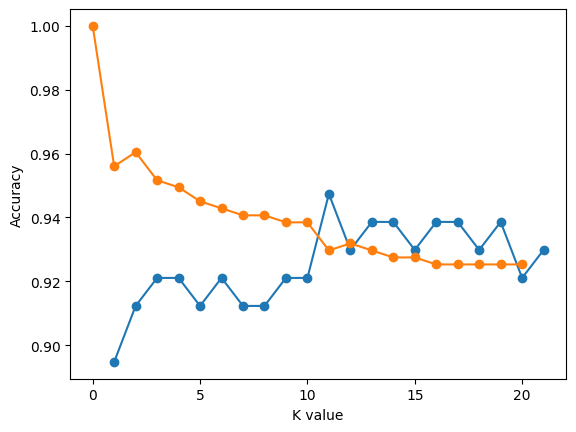

In [130]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
acc_1test = []
acc_1train = []
for k in range(1, 22):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_1train.append(acc_train)
    acc_1test.append(acc_test)

plt.plot(range(1, 22), acc_1test,acc_1train, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()




In [131]:
from sklearn.neighbors import KNeighborsClassifier
acc_1test = []
acc_1train = []
for k in range(1, 22):

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_1train.append(acc_train)
    acc_1test.append(acc_test)
    print(acc_train)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [132]:
import pickle

# Example: Save your trained model
pickle.dump(lr, open('breast_cancer_model.pkl', 'wb'))

print("Model saved successfully.")

Model saved successfully.
